In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/software-defect-prediction-nasa/MC1.arff
/kaggle/input/software-defect-prediction-nasa/PC3.arff
/kaggle/input/software-defect-prediction-nasa/KC1.arff
/kaggle/input/software-defect-prediction-nasa/jm1.csv
/kaggle/input/software-defect-prediction-nasa/CM1.arff
/kaggle/input/software-defect-prediction-nasa/KC4.arff
/kaggle/input/software-defect-prediction-nasa/PC4.arff
/kaggle/input/software-defect-prediction-nasa/KC3.arff
/kaggle/input/software-defect-prediction-nasa/PC2.arff
/kaggle/input/software-defect-prediction-nasa/JM1.arff
/kaggle/input/software-defect-prediction-nasa/MC2.arff
/kaggle/input/software-defect-prediction-nasa/PC5.arff
/kaggle/input/software-defect-prediction-nasa/MW1.arff
/kaggle/input/software-defect-prediction-nasa/PC1.arff


1.  "build: Baseline(based on machine leanring)"
1.  "feats: Introduction"
1.  "fix: EDA plot method"
1.  "feats: Machine Learning model - Decision Tree"
1.  "fix: evaluate function"
1.  "feats: Machine Learning model - boosting ['xgboost', 'lightgbm', 'catboost']"
1.  "feats: Deep Learning model - MLP"

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

In [3]:
# load data
data = pd.read_csv('/kaggle/input/software-defect-prediction-nasa/jm1.csv')
data.shape

(10885, 22)

1. EDA
1. import some dependencies to plot
1. use plotly to visualization
1. label classification
1. count and plot(visualization)
1. value visualization
1. use historgram to visualization attribution
1. relationship
1. covariance
1. heatmap
1. scatter

In [4]:
# import some dependencies to plot

from plotly.offline import iplot
# init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [5]:
# check data
def show_info(data, is_matrix_transpose=False):
    # basic shape
    print('data shape is: {}   sample number {}   attribute number {}\n'.format(data.shape, data.shape[0], data.shape[1]))
    # attribute(key)
    print('data columns number {}  \nall columns: {}\n'.format(len(data.columns) ,data.columns))
    # value's null
    print('data all attribute count null:\n', data.isna().sum())
    # data value analysis and data demo
    if is_matrix_transpose:
        print('data value analysis: ', data.describe().T)
        print('data demo without matrix transpose: ', data.head().T)
    else:
        print('data value analysis: ', data.describe())
        print('data demo without matrix transpose: ', data.head())
        
show_info(data)

data shape is: (10885, 22)   sample number 10885   attribute number 22

data columns number 22  
all columns: Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'],
      dtype='object')

data all attribute count null:
 loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64
data value analysis:                  loc          v(g)         ev(g)         iv(g)       

In [7]:
data.head().T

,0,1,2,3,4
loc,1.1,1,72,190,37
v(g),1.4,1,7,3,4
ev(g),1.4,1,1,1,1
iv(g),1.4,1,6,3,4
n,1.3,1,198,600,126
v,1.3,1,1134.13,4348.76,599.12
l,1.3,1,0.05,0.06,0.06
d,1.3,1,20.31,17.06,17.19
i,1.3,1,55.85,254.87,34.86
e,1.3,1,23029.1,74202.7,10297.3


True:  2106 False:  8779


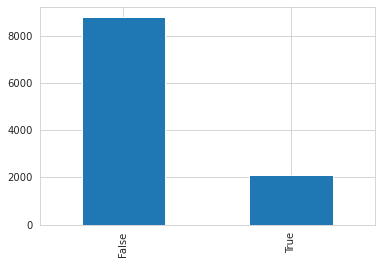

In [8]:
# label classification
defects_true_false = data.groupby('defects')['b'].apply(lambda x: x.count())
print('True: ', defects_true_false[1], 'False: ', defects_true_false[0])
data.defects.value_counts().plot.bar()

In [9]:
# Attribute relationship -- covariance
data.corr()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,defects
loc,1.000000,0.817757,0.517551,0.784057,0.881795,0.900293,-0.286587,0.689543,0.499946,0.750564,0.899965,0.750564,0.921918,0.612858,0.803573,0.278119,0.245388
v(g),0.817757,1.000000,0.701710,0.859590,0.730781,0.759881,-0.252902,0.669057,0.303031,0.709501,0.759635,0.709501,0.799915,0.384506,0.538366,0.209811,0.208644
ev(g),0.517551,0.701710,1.000000,0.639574,0.465992,0.445902,-0.233982,0.434009,0.213211,0.315538,0.445693,0.315538,0.454604,0.294208,0.338243,0.190911,0.172973
iv(g),0.784057,0.859590,0.639574,1.000000,0.702415,0.743193,-0.197736,0.575369,0.309717,0.757702,0.743013,0.757702,0.775873,0.351583,0.541296,0.207028,0.181984
n,0.881795,0.730781,0.465992,0.702415,1.000000,0.984276,-0.240749,0.808113,0.651209,0.716536,0.983938,0.716536,0.944383,0.596374,0.798561,0.284391,0.204143
v,0.900293,0.759881,0.445902,0.743193,0.984276,1.000000,-0.198104,0.752206,0.598743,0.800000,0.999696,0.800000,0.962078,0.576844,0.792330,0.266537,0.189136
l,-0.286587,-0.252902,-0.233982,-0.197736,-0.240749,-0.198104,1.000000,-0.347215,-0.166801,-0.062026,-0.196147,-0.062026,-0.218373,-0.165885,-0.223670,-0.106117,-0.164917
d,0.689543,0.669057,0.434009,0.575369,0.808113,0.752206,-0.347215,1.000000,0.398162,0.574298,0.751835,0.574298,0.768188,0.502121,0.637211,0.253793,0.169629
i,0.499946,0.303031,0.213211,0.309717,0.651209,0.598743,-0.166801,0.398162,1.000000,0.209268,0.598341,0.209268,0.563920,0.392551,0.572352,0.217810,0.192831
e,0.750564,0.709501,0.315538,0.757702,0.716536,0.800000,-0.062026,0.574298,0.209268,1.000000,0.799868,1.000000,0.809070,0.384806,0.600649,0.148693,0.086036


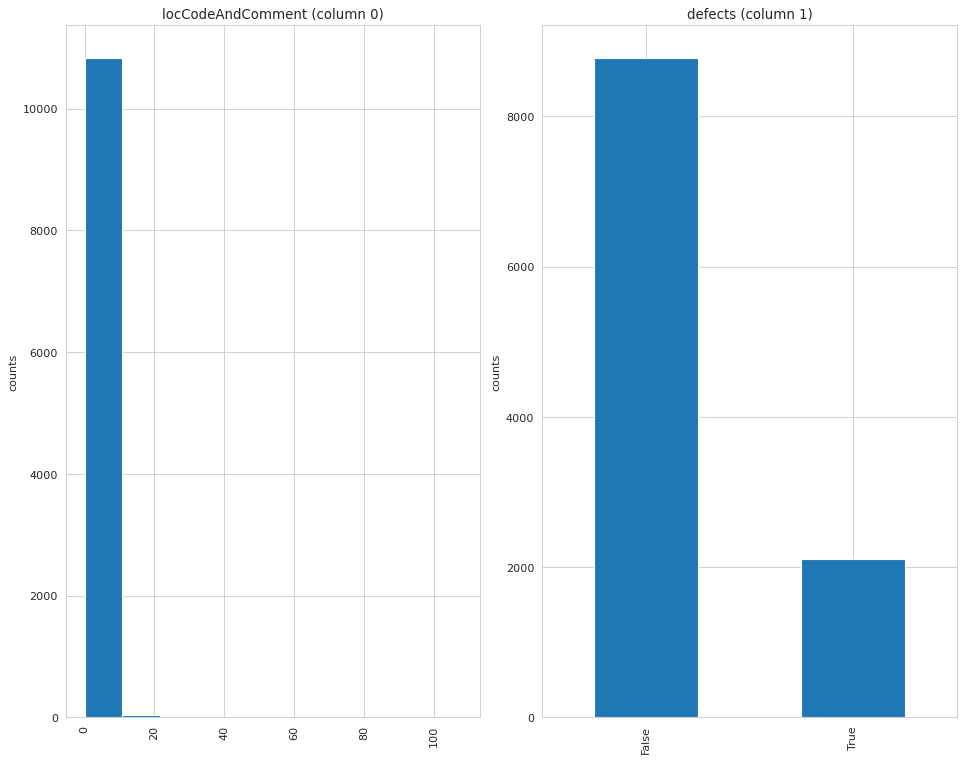

In [10]:
# plot columns distribution
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
plotPerColumnDistribution(data, 10, 5)

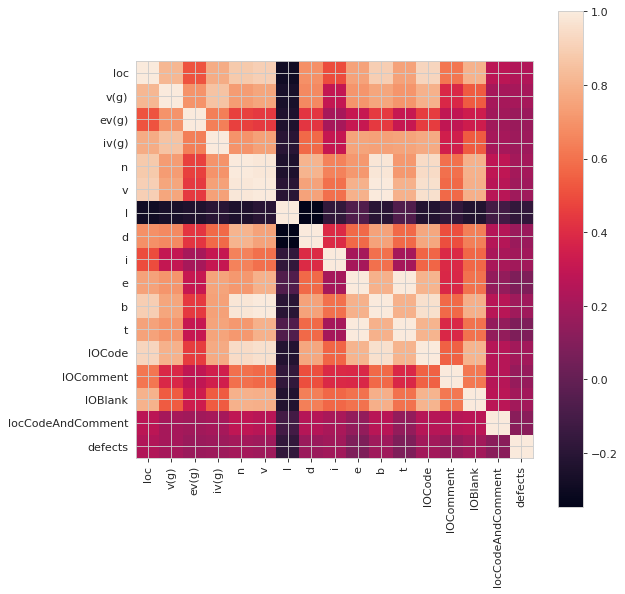

In [11]:
# plot corr
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

plotCorrelationMatrix(data, 8)

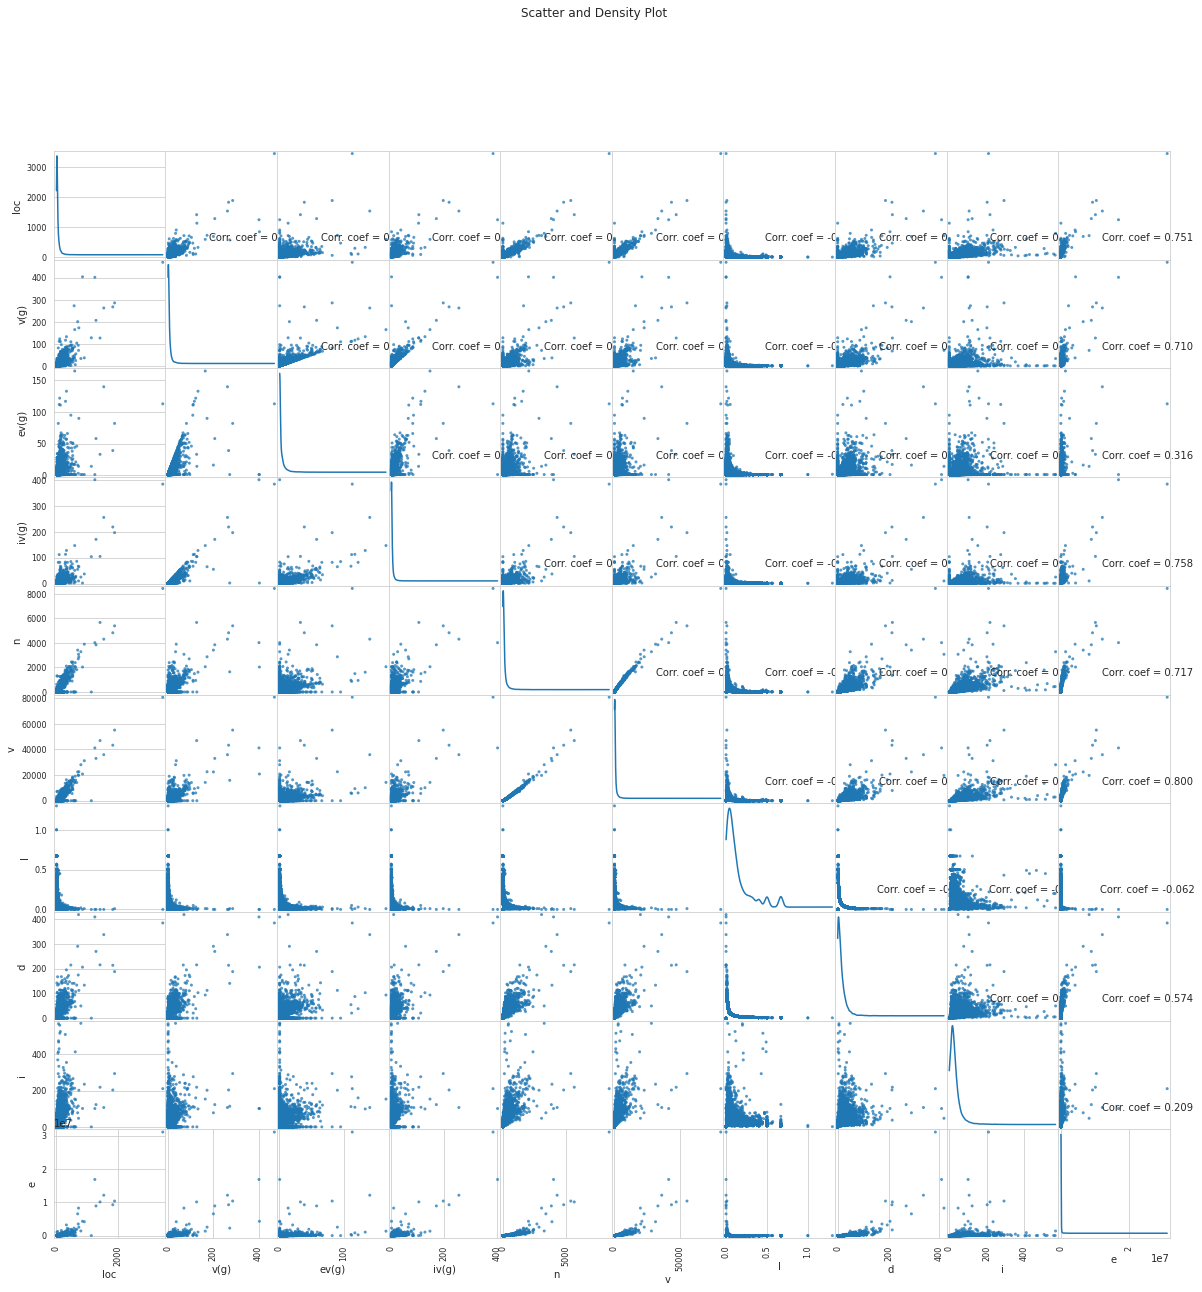

In [12]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    
plotScatterMatrix(data, 20, 10)

* Data cleaning
* fillna
* remove outliars (by use boxplot to visualization)
* 1. data type transform
* remove ~char

In [13]:
trace1 = go.Box(x=data['uniq_Op'])
box_data = [trace1]
iplot(box_data)

1. some special columns
1. data cleaning
1. change data type

In [14]:
# some special columns [type is 'object']
object_type_cols = ['uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']
# data.head()
# data['uniq_Op'] = data['uniq_Op'].astype(np.float64)
# data['uniq_Opnd'] = data['uniq_Opnd'].astype(np.float64)
# data['total_Op'] = data['total_Op'].astype(np.float64)
# data['total_Opnd'] = data['total_Opnd'].astype(np.float64)
# data['branchCount'] = data['branchCount'].astype(np.float64)

In [15]:
# extract useful attributions and create new attribution
def extract_and_eval(data):
    '''
    input: data
    goal: make an evaluation to every sample and label
    '''
    eval = (data.n < 300) & (data.v < 1000) & (data.d < 50) & (data.e < 500000) & (data.t < 5000)
    data['eval'] = pd.DataFrame(eval)
    data['eval'] = [1 if e == True else 0 for e in data['eval']]

extract_and_eval(data)
show_info(data)

data shape is: (10885, 23)   sample number 10885   attribute number 23

data columns number 23  
all columns: Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects',
       'eval'],
      dtype='object')

data all attribute count null:
 loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
eval                 0
dtype: int64
data value analysis:                  loc          v

1. Data Normalization¶
1. load importance
1. use Min-Max Normalization

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scale_v = data[['v']]
scale_b = data[['b']]

minmax_scaler = MinMaxScaler()

v_scaled = minmax_scaler.fit_transform(scale_v)
b_scaled = minmax_scaler.fit_transform(scale_b)
data['scaled_v'] = pd.DataFrame(v_scaled)
data['scaled_b'] = pd.DataFrame(b_scaled)

# check data
show_info(data)

data shape is: (10885, 25)   sample number 10885   attribute number 25

data columns number 25  
all columns: Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects', 'eval',
       'scaled_v', 'scaled_b'],
      dtype='object')

data all attribute count null:
 loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
eval                 0
scaled_v             0
scaled_b          

In [18]:
tem_data = data.copy()

1. Model
1. hyper-parameter
1. data prepare
1. extract target(label)
1. train train split
1. cross-validation(because of data size only 1w) => use 10-cv
1. build model
1. naive bayes
1. LR
1. Boosting
1. xgboost
1. lightgbm
1. fit, predict, evaluate(precision, recall, f1-score, acc, roc, auc)

In [19]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# machine learning model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
# boosting
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [20]:
# hyper-parameter
validation_size = 0.1
random_seed=42

In [21]:
# extract target
data['target'] = data['defects'].apply(lambda x: 1 if x == True else 0)
data = data.drop(['defects'], axis=1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [23]:

# data type change prework
origin_data_type_cols = ['uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']
data = data.drop(origin_data_type_cols, axis=1)
# for col in origin_data_type_cols:
#     data[col] = data[data[col].is_number()]
#     data[col] = data[col].astype(np.float64)
# data.info()

In [24]:
target = data['target']
data = data.drop(['target'], axis=1)
X_train, X_val, y_train, y_val = train_test_split(
    data,
    target,
    test_size=validation_size,
    random_state=random_seed
)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((9796, 19), (1089, 19), (9796,), (1089,))

In [25]:
# model evaluation calculate and score
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score,  mean_squared_error
# model evaluation 
from sklearn.metrics import classification_report, confusion_matrix

# metrics method
def metrics_calculate(model_name, y_val, y_pred):
    '''
    0. basic metrics values ['accuracy', 'precision', 'recall', 'fpr', 'fnr', 'auc']
    1. classification report
    2. confusion matrix
    '''
#     y_val = np.reshape(y_val, -1).astype(np.int32)
#     y_pred = np.where(np.reshape(y_pred, -1) > 0.5, 1, 0)
#     accuracy = accuracy_score(y_val, y_pred)
#     precision = precision_score(y_val, y_pred)
#     recall = recall_score(y_val, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    fpr = fp / (tn + fp)
    fnr = fn / (tp + fn)
#     auc = roc_auc_score(y_val, y_pred)
#     print('Model:%s Acc:%.8f Prec:%.8f Recall:%.8f FNR:%.8f FPR:%.8f AUC:%.8f' % (model_name, accuracy, precision, recall, fnr, fpr, auc))
    print(model_name, 'classification report:\n', classification_report(y_val, y_pred))
    print(model_name, 'confusion_matrix:\n', confusion_matrix(y_val, y_pred))
    print('\n%s FNR:%.8f FPR:%.8f\n%s accuracy:%.8f' % (model_name, fnr, fpr, model_name, accuracy_score(y_pred,y_val)))

In [26]:
# plot metrics model answer(metrics)
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

def metrics_plot(model_name, model, X_val, y_val):
    # plot P-R curve
    disp = plot_precision_recall_curve(model, X_val, y_val)
#     disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision))

1. Boosting
1. xgboost
1. lightgbm
1. catboost
1. Choose a model that performs best => gridSearchCV
1. get best parameter

In [27]:
%%time

# lightgbm
lgb = LGBMClassifier(
    max_depth=7,
    lambda_l1=0.1,
    lambda_l2=0.01,
    learning_rate=0.01,
    n_estimators=500,
    reg_aplha=1.1,
    colsample_bytree=0.9,
    subsample=0.9,
    n_jobs=5
)
# cv = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
# print('lightgbm cv score: ', cv)


CPU times: user 53 µs, sys: 0 ns, total: 53 µs
Wall time: 57.9 µs


In [28]:
# fit
lgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='accuracy', verbose=True, early_stopping_rounds=50)
# predict
y_pred = lgb.predict(X_val)
# evaluate
metrics_calculate('Boosting lightgbm', y_val, y_pred)

[1]	valid_0's binary_logloss: 0.475035
Training until validation scores don't improve for 50 rounds
[2]	valid_0's binary_logloss: 0.473947
[3]	valid_0's binary_logloss: 0.472931
[4]	valid_0's binary_logloss: 0.471926
[5]	valid_0's binary_logloss: 0.470901
[6]	valid_0's binary_logloss: 0.469955
[7]	valid_0's binary_logloss: 0.469018
[8]	valid_0's binary_logloss: 0.468083
[9]	valid_0's binary_logloss: 0.467227
[10]	valid_0's binary_logloss: 0.466439
[11]	valid_0's binary_logloss: 0.465614
[12]	valid_0's binary_logloss: 0.464819
[13]	valid_0's binary_logloss: 0.464126
[14]	valid_0's binary_logloss: 0.463439
[15]	valid_0's binary_logloss: 0.462635
[16]	valid_0's binary_logloss: 0.461921
[17]	valid_0's binary_logloss: 0.461152
[18]	valid_0's binary_logloss: 0.46041
[19]	valid_0's binary_logloss: 0.459714
[20]	valid_0's binary_logloss: 0.459012
[21]	valid_0's binary_logloss: 0.458406
[22]	valid_0's binary_logloss: 0.457707
[23]	valid_0's binary_logloss: 0.457029
[24]	valid_0's binary_logloss

[209]	valid_0's binary_logloss: 0.421393
[210]	valid_0's binary_logloss: 0.42134
[211]	valid_0's binary_logloss: 0.421291
[212]	valid_0's binary_logloss: 0.421294
[213]	valid_0's binary_logloss: 0.421234
[214]	valid_0's binary_logloss: 0.421207
[215]	valid_0's binary_logloss: 0.421152
[216]	valid_0's binary_logloss: 0.421132
[217]	valid_0's binary_logloss: 0.421065
[218]	valid_0's binary_logloss: 0.421021
[219]	valid_0's binary_logloss: 0.420994
[220]	valid_0's binary_logloss: 0.420895
[221]	valid_0's binary_logloss: 0.420823
[222]	valid_0's binary_logloss: 0.420792
[223]	valid_0's binary_logloss: 0.420745
[224]	valid_0's binary_logloss: 0.420716
[225]	valid_0's binary_logloss: 0.420701
[226]	valid_0's binary_logloss: 0.42065
[227]	valid_0's binary_logloss: 0.420618
[228]	valid_0's binary_logloss: 0.420565
[229]	valid_0's binary_logloss: 0.420444
[230]	valid_0's binary_logloss: 0.420399
[231]	valid_0's binary_logloss: 0.420316
[232]	valid_0's binary_logloss: 0.420294
[233]	valid_0's bi

Boosting lightgbm confusion_matrix:
 [[865  25]
 [177  22]]

Boosting lightgbm FNR:0.88944724 FPR:0.02808989
Boosting lightgbm accuracy:0.81450872


In [30]:
%%time

# catboost
cb = CatBoostClassifier(
    depth = 9, 
    reg_lambda=0.1,
    learning_rate = 0.09,
    iterations = 500
)
# cv = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

CPU times: user 0 ns, sys: 351 µs, total: 351 µs
Wall time: 3.2 ms


In [31]:
# fit
cb.fit(X_train, y_train, eval_set=[(X_val, y_val)],  verbose=True, early_stopping_rounds=50)
# predict
cb.predict(X_val)
# evaluate
metrics_calculate('Catboost', y_val, y_pred)

0:	learn: 0.6451808	test: 0.6446474	best: 0.6446474 (0)	total: 82ms	remaining: 40.9s
1:	learn: 0.6063748	test: 0.6058926	best: 0.6058926 (1)	total: 100ms	remaining: 24.9s
2:	learn: 0.5764294	test: 0.5760307	best: 0.5760307 (2)	total: 116ms	remaining: 19.3s
3:	learn: 0.5498136	test: 0.5495133	best: 0.5495133 (3)	total: 133ms	remaining: 16.5s
4:	learn: 0.5300104	test: 0.5293208	best: 0.5293208 (4)	total: 150ms	remaining: 14.9s
5:	learn: 0.5115391	test: 0.5106719	best: 0.5106719 (5)	total: 167ms	remaining: 13.7s
6:	learn: 0.4985350	test: 0.4975576	best: 0.4975576 (6)	total: 184ms	remaining: 12.9s
7:	learn: 0.4867212	test: 0.4866060	best: 0.4866060 (7)	total: 202ms	remaining: 12.4s
8:	learn: 0.4770833	test: 0.4776177	best: 0.4776177 (8)	total: 221ms	remaining: 12s
9:	learn: 0.4685402	test: 0.4692454	best: 0.4692454 (9)	total: 238ms	remaining: 11.7s
10:	learn: 0.4628381	test: 0.4633395	best: 0.4633395 (10)	total: 255ms	remaining: 11.3s
11:	learn: 0.4567113	test: 0.4573773	best: 0.4573773 (1

104:	learn: 0.3367779	test: 0.4235697	best: 0.4197771 (89)	total: 1.95s	remaining: 7.33s
105:	learn: 0.3357685	test: 0.4242710	best: 0.4197771 (89)	total: 1.97s	remaining: 7.31s
106:	learn: 0.3332179	test: 0.4250524	best: 0.4197771 (89)	total: 1.98s	remaining: 7.29s
107:	learn: 0.3320807	test: 0.4251605	best: 0.4197771 (89)	total: 2s	remaining: 7.27s
108:	learn: 0.3308760	test: 0.4254674	best: 0.4197771 (89)	total: 2.02s	remaining: 7.24s
109:	learn: 0.3301275	test: 0.4251588	best: 0.4197771 (89)	total: 2.04s	remaining: 7.22s
110:	learn: 0.3277547	test: 0.4244026	best: 0.4197771 (89)	total: 2.05s	remaining: 7.2s
111:	learn: 0.3262877	test: 0.4237640	best: 0.4197771 (89)	total: 2.07s	remaining: 7.18s
112:	learn: 0.3248157	test: 0.4238944	best: 0.4197771 (89)	total: 2.09s	remaining: 7.16s
113:	learn: 0.3242221	test: 0.4236089	best: 0.4197771 (89)	total: 2.11s	remaining: 7.13s
114:	learn: 0.3229827	test: 0.4237407	best: 0.4197771 (89)	total: 2.13s	remaining: 7.12s
115:	learn: 0.3219848	tes

In [32]:
%%time

# xgboost
xgb = XGBClassifier(
    max_depth=9,
    learning_rate=0.01,
    n_estimators=500,
    reg_alpha=1.1,
    colsample_bytree = 0.9, 
    subsample = 0.9,
    n_jobs = 5
)
# cv = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
# print('xgboost cv score: ', cv)

CPU times: user 34 µs, sys: 5 µs, total: 39 µs
Wall time: 42.9 µs


In [33]:
# fit
%time xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True, early_stopping_rounds=2)
# pred
y_pred = xgb.predict(X_val)
# evaluate
metrics_calculate('Boosting xgboost', y_val, y_pred)

[0]	validation_0-error:0.18733
Will train until validation_0-error hasn't improved in 2 rounds.
[1]	validation_0-error:0.18825
[2]	validation_0-error:0.18916
Stopping. Best iteration:
[0]	validation_0-error:0.18733

CPU times: user 281 ms, sys: 184 ms, total: 464 ms
Wall time: 128 ms
Boosting xgboost classification report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.89       890
           1       0.46      0.16      0.23       199

    accuracy                           0.81      1089
   macro avg       0.65      0.56      0.56      1089
weighted avg       0.77      0.81      0.77      1089

Boosting xgboost confusion_matrix:
 [[854  36]
 [168  31]]

Boosting xgboost FNR:0.84422111 FPR:0.04044944
Boosting xgboost accuracy:0.81267218


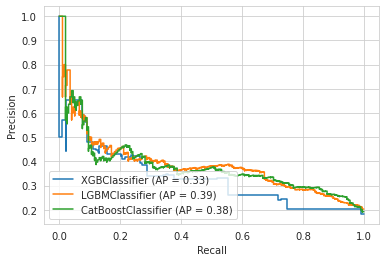

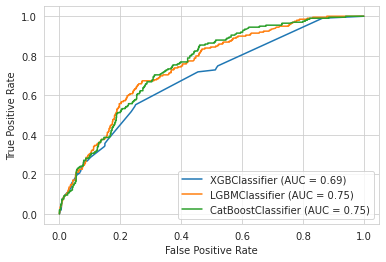

In [34]:
# compare boosting [P-R curve]
PR_curve = plot_precision_recall_curve(xgb, X_val, y_val)
PR_curve = plot_precision_recall_curve(lgb, X_val, y_val, ax=PR_curve.ax_)
PR_curve = plot_precision_recall_curve(cb, X_val, y_val, ax=PR_curve.ax_)
# compare boosting [ROC curve]
ROC_curve = plot_roc_curve(xgb, X_val, y_val)
ROC_curve = plot_roc_curve(lgb, X_val, y_val, ax=ROC_curve.ax_)
ROC_curve = plot_roc_curve(cb, X_val, y_val, ax=ROC_curve.ax_)

In [35]:
from sklearn.model_selection import GridSearchCV

def grid_search_params(model, parameters, X_train, y_train):
    gsearch = GridSearchCV(model, param_grid=parameters, scoring='roc_auc', cv=3)
    gsearch.fit(X_train, y_train)
    print('Best param value is: {0}\n'.format(gsearch.best_params_))
    print('Best score is: {0}\n'.format(gsearch.best_score_))
    print(gsearch.cv_results_['mean_test_score'], '\n')
#     print(gsearch.cv_results_['params'], '\n')

In [ ]:
# %%time

# # xgboost -- gridsearchcv
# gs_xgb = XGBClassifier(
#     eta= 0.3, 
#     n_estimators= 500,
#     gamma= 0,
#     max_depth= 6, 
#     min_child_weight= 1,
#     colsample_bytree= 1, 
#     colsample_bylevel= 1, 
#     subsample= 1, 
#     reg_lambda= 1, 
#     reg_alpha= 0,
#     seed= 33
# )

# # scale of tree
# scale_tree_params = {
#     'max_depth':[3,5,7,9],
#     'min_child_weight':[1,3,5]
# }


# # control fit degree
# fit_degree_params = {
#     'subsample':[i/10.0 for i in range(6,10)],
#     'colsample_bytree':[i/10.0 for i in range(6,10)],
#     'min_child_weight':[6,8,10,12],
#     'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
# }

# print('Search for best tree scale parameters')
# grid_search_params(gs_xgb, scale_tree_params, X_train, y_train)

# print('Search for best fit degree parameters')
# grid_search_params(gs_xgb, fit_degree_params, X_train, y_train)
# gs_xgb = XGBClassifier(
#     eta= 0.3, 
#     n_estimators= 500,
#     gamma= 0,
#     max_depth= 6, 
#     min_child_weight= 1,
#     colsample_bytree= 1, 
#     colsample_bylevel= 1, 
#     subsample= 1, 
#     reg_lambda= 1, 
#     reg_alpha= 0,
#     seed= 33
# )
# # test best parameters and origin 
# gs_xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='accuracy', verbose=True, early_stopping_rounds=5)
# # predict
# y_pred = gs_xgb.predict(X_val)
# # evaluate
# metrics_calculate('Boosting xgboost after grid-search-cv: ', y_val, y_pred)

* Lightgbm GridSearchCV¶
* tree scale [cart regression tree]
* control fit degree

In [ ]:
%%time

# init parameters
gs_lgb = LGBMClassifier(
    objective = 'binary',
    is_unbalance = True,
    metric = 'binary_logloss,auc',
    max_depth = 6,
    num_leaves = 40,
    learning_rate = 0.1,
    feature_fraction = 0.7,
    min_child_samples=21,
    min_child_weight=0.001,
    bagging_fraction = 1,
    bagging_freq = 2,
    reg_alpha = 0.001,
    reg_lambda = 8,
    cat_smooth = 0,
    num_iterations = 200,
)

# scale of tree
scale_tree_params = {
    'max_depth': [4, 6, 8],
    'num_leaves': [20, 30, 40],
    'min_child_samples': [18, 19, 20, 21, 22],
    'min_child_weight': [0.001, 0.002],
    'feature_fraction': [0.6, 0.8, 1],
}

# control fit degree
fit_degree_params = {
    
}

print('Search for best tree scale parameters')
grid_search_params(gs_lgb, scale_tree_params, X_train, y_train)

# print('Search for best fit degree parameters')
# grid_search_params(gs_lgb, fit_degree_params, X_train, y_train)

Search for best tree scale parameters


In [ ]:
# init
gs_lgb = LGBMClassifier(
    objective = 'binary',
    is_unbalance = True,
    metric = 'binary_logloss,auc',
    max_depth = 6,
    num_leaves = 20,
    learning_rate = 0.1,
    feature_fraction = 1,
    min_child_samples=19,
    min_child_weight=0.001,
    bagging_fraction = 1,
    bagging_freq = 2,
    reg_alpha = 0.001, 
    reg_lambda = 8,
    cat_smooth = 0,
    num_iterations = 200,
)

In [ ]:
# fit
%time gs_lgb.fit(X_train, y_train)
# predict
y_pred = gs_lgb.predict(X_val)
# evaluate
metrics_calculate('Boosting lightgbm after grid-search-cv: ', y_val, y_pred)